<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chargement des données</a></span></li><li><span><a href="#Présentation-des-tâches" data-toc-modified-id="Présentation-des-tâches-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Présentation des tâches</a></span><ul class="toc-item"><li><span><a href="#Quelques-ressources" data-toc-modified-id="Quelques-ressources-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Quelques ressources</a></span><ul class="toc-item"><li><span><a href="#Pandas" data-toc-modified-id="Pandas-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Pandas</a></span></li><li><span><a href="#expressions-régulières:" data-toc-modified-id="expressions-régulières:-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>expressions régulières:</a></span></li></ul></li></ul></li><li><span><a href="#Tâches" data-toc-modified-id="Tâches-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Tâches</a></span><ul class="toc-item"><li><span><a href="#Tâche-1" data-toc-modified-id="Tâche-1-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Tâche 1</a></span></li><li><span><a href="#Tâche-2" data-toc-modified-id="Tâche-2-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Tâche 2</a></span></li><li><span><a href="#Tâche-3" data-toc-modified-id="Tâche-3-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Tâche 3</a></span></li><li><span><a href="#Tâche-4" data-toc-modified-id="Tâche-4-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Tâche 4</a></span></li><li><span><a href="#Tâche-5" data-toc-modified-id="Tâche-5-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Tâche 5</a></span></li></ul></li></ul></div>

Le but de ce tutoriel est de vous familiariser avec `pandas` et les expressions régulières qui vous seront utiles pour vos projets.

Ce tutoriel, contrairement au précédent ne vous donne pas les solutions et vous laisse essayer de résoudre diverses tâches. Le contenu qui vous sera utile pour apprendre `pandas` et les expressions régulières est externe à ce tutoriel et est référencé plus bas.

Je vous invite à chercher de vous même d'autres ressources, car celle qui sont présentes dans ce tutoriel ne sont pas exhaustives. De plus, vous pouvez me contactez par mail au besoin et nous planifierons une réunion.

Les tâches qui vous sont proposées devraient vous aider à vous familiarisez avec les données et sur la manière de les manipuler. La tâche 1 vous permettra de comprendre les bases de pandas. La tâche 2 de comprendre les expressions régulières. Les tâches 3 et 4 de passer de phrases aux mots (qui peut être utiler pour nettoyer des données). Et finalement la tâche 5 vous permettra de détecter des doublons d'entrées.

Nous commençons par quelques `import` et définition de fonction utile, il n'est pas nécessaire de tout comprendre dans la cellule suivante.

Pour ceux qui n'ont pas installé `Anaconda`, avant de pouvoir utiliser ce tutoriel, il vous faut installer `pandas` avec la commande `pip install pandas`.

In [1]:
import pandas as pd

from IPython.display import display
from urllib.parse import quote

doc2start = {"bpt6k63243601": 123, "bpt6k62931221": 151, "bpt6k6286466w": 189, "bpt6k6393838j": 219, "bpt6k6331310g": 216, "bpt6k6292987t": 353, "bpt6k62906378": 288, "bpt6k6391515w": 319, "bpt6k6315927h": 349, "bpt6k6319106t": 324, "bpt6k6315985z": 82, "bpt6k63959929": 82, "bpt6k63197984": 56, "bpt6k6389871r": 77, "bpt6k6319811j": 79, "bpt6k6282019m": 72, "bpt6k6314752k": 190, "bpt6k6305463c": 113, "bpt6k6318531z": 108, "bpt6k6324389h": 72, "bpt6k63243920": 80, "bpt6k6309075f": 96, "bpt6k6333200c": 132, "bpt6k63243905": 134, "bpt6k6333170p": 137, "bpt6k96727875": 135, "bpt6k9764746t": 99, "bpt6k97645375": 123, "bpt6k9672117f": 125, "bpt6k9763554c": 123, "bpt6k9763553z": 105, "bpt6k9677392n": 110, "bpt6k9692809v": 113, "bpt6k9762929c": 129, "bpt6k9672776c": 119, "bpt6k9764647w": 121, "bpt6k9669143t": 145, "bpt6k9677737t": 139, "bpt6k9668037f": 167, "bpt6k96839542": 171, "bpt6k96762564": 185, "bpt6k9685861g": 189, "bpt6k9763471j": 153, "bpt6k9762899p": 157, "bpt6k97630871": 11, "bpt6k9684454n": 235, "bpt6k9732740w": 239, "bpt6k9684013b": 189, "bpt6k9692626p": 305, "bpt6k9685098r": 281, "bpt6k9764402m": 329, "bpt6k97631451": 322, "bpt6k9776121t": 49, "bpt6k9775724t": 33, "bpt6k97774838": 327, "bpt6k9780089g": 339}

def entry2url(row):
    """
    Takes a row of an Annuaire csv and
    transforms it to the corresponding Gallica url
    """
    url = "https://gallica.bnf.fr/ark:/12148/"
    
    directory = row['directory']
    page = row['page'] - doc2start[directory]
    url += f"{row['directory']}/f{row['page']-doc2start[row['directory']]}"
    
    r_strings = []
    if 'name' in row and pd.notna(row['name']):
        r_strings.append(quote(row['name'].replace('.', ' ')))
    if 'job' in row and pd.notna(row['job']):
        r_strings.append(quote(row['job'].replace('.', ' ')))
    if 'street' in row and pd.notna(row['street']):
        r_strings.append(quote(row['street'].replace('.', ' ')))
    if 'number' in row and pd.notna(row['number']):
        r_strings.append(quote(row['number'].replace('.', ' ')))
    
    if len(r_strings) > 0:
        url += f".item.r={'%20'.join(r_strings)}.zoom"
    
    return url

def add_clickable_url(bottin_dataframe):
    bottin_dataframe = bottin_dataframe.copy()
    bottin_dataframe['url'] = bottin_dataframe.apply(entry2url, axis=1)
    def make_clickable(val):
        return '<a href="{}">gallica url</a>'.format(val,val)

    return bottin_dataframe.style.format(make_clickable, subset=['url'])

# Chargement des données

`Pandas` est une librairie qui permet de traiter des données tabulaires.

Elle comporte deux types d'objets, les `Series` qui correspondent à des colonnes et des `Dataframe` qui correspondent à des colonnes mises en tableau.

`Pandas` permet de directement lire les fichier `csv` à l'aide de la fonction `pd.read_csv`.

In [2]:
data_bottin = pd.read_csv('./bottin_test_data.zip')

In [3]:
data_bottin = pd.read_csv('../data/bottin_data_groupe_6.zip')

In [4]:
len(data_bottin['name'].unique()), len(data_bottin['job'].unique()), len(data_bottin['street'].unique())

(228108, 63795, 41640)

In [5]:
import editdistance
import numpy as np
from tqdm.notebook import tqdm
import multiprocessing as mp

0                 [vins, et, hôtel]
1              [march, de, chevaux]
2         [fantaisies, pour, modes]
3                      [négociants]
4                [vente, à, crédit]
                    ...            
617231                 [serruriers]
617232            [perles, fausses]
617233                 [restaurant]
617234                        [bar]
617235                   [dentiste]
Name: job, Length: 617236, dtype: object

In [8]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter()
data_bottin['job'].fillna('').apply(words).apply(WORDS.update)

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [20]:
WORDS.most_common()[-15:]

[('achai', 1),
 ('orsets', 1),
 ('plncement', 1),
 ('reprós', 1),
 ('poch', 1),
 ('cport', 1),
 ('tare', 1),
 ('couillages', 1),
 ('grangebatelière', 1),
 ('peliers', 1),
 ('manut', 1),
 ('criblages', 1),
 ('mangin', 1),
 ('étectricien', 1),
 ('nutrition', 1)]

In [21]:
correction('plncement')

'plncement'

In [6]:
from similarity.qgram import QGram

qgram = QGram(1)

qgram.distance("ABCYD", "AABCCDE")

4

In [7]:
import ray
ray.init(num_cpus=32)

2020-04-28 21:41:05,918	WARNING worker.py:673 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-04-28 21:41:05,919	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-04-28 21:41:05,920	INFO resource_spec.py:216 -- Starting Ray with 13.57 GiB memory available for workers and up to 6.8 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


{'node_ip_address': '192.168.0.115',
 'redis_address': '192.168.0.115:59728',
 'object_store_address': '/tmp/ray/session_2020-04-28_21-41-05_919237_1603846/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-28_21-41-05_919237_1603846/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2020-04-28_21-41-05_919237_1603846'}

In [8]:
unique_names = pd.DataFrame(data_bottin['name'].unique(), columns=['name'])
unique_names['len'] = unique_names['name'].apply(len)
unique_names = unique_names.sort_values(by=['len']).reset_index(drop=True)

In [8]:
unique_names.iloc[:3570]

,name,len
0,Eny,3
1,Vre,3
2,Pol,3
3,Plô,3
4,Gry,3
...,...,...
3565,Pavé,4
3566,Boby,4
3567,Nais,4
3568,Nagé,4


In [9]:
limits = (np.nonzero(unique_names['len'].values[1:]-unique_names['len'].values[:-1])[0]+1).tolist() + [len(unique_names)]

In [10]:
len2limit = dict(zip(unique_names['len'].unique(), limits))

In [46]:
idx1 = 0

In [47]:
max_dist = 4


0         True
1         True
2         True
3         True
4         True
          ... 
269588    True
269589    True
269590    True
269591    True
269592    True
Name: len, Length: 269593, dtype: bool

In [52]:
name, length = unique_names.iloc[idx1]

In [59]:
unique_names[(unique_names['len'] > length-max_dist) & (unique_names['len'] < length+max_dist)].reset_index()

,index,name,len
0,0,Eny,3
1,1,Vre,3
2,2,Pol,3
3,3,Plô,3
4,4,Gry,3
...,...,...,...
29809,29809,Warhen,6
29810,29810,Bromet,6
29811,29811,Arnaut,6
29812,29812,Poperl,6


In [9]:
from polyleven import levenshtein

max_dist = 3
len2subset = {length: unique_names[(unique_names['len'] > length-max_dist) & (unique_names['len'] < length+max_dist)].reset_index() for length in unique_names['len'].unique()}

In [82]:
set([tuple((1,2))])

{(1, 2)}

In [86]:
def f(idx1)

In [98]:
unique_names = data_bottin['name'].unique().tolist()

In [46]:
from numba import jit
from numba.typed import List

# lengths = 
lengths = List()
[lengths.append(x) for x in unique_names['len'].values.tolist()]
# lengths = lengths[:10000]
num_unique = len(lengths)
max_dist = 3

@jit(nopython=True)
def f(lengths):
    res = []
    for idx1 in range(num_unique):
        for idx2 in range(idx1, num_unique):
            l1 = lengths[idx1]
            l2 = lengths[idx2]
            if abs(l1 - l2) > max_dist:
                continue
            res.append((idx1, idx2))
#         if idx1 % 1001 == 0:
#             print(idx1)
    return res

In [48]:
@jit(nopython=True, parallel=True)
def f2(idx1, lengths):
    res = []
    for idx2 in range(idx1, num_unique):
        l1 = lengths[idx1]
        l2 = lengths[idx2]
        if abs(l1 - l2) > max_dist:
            break
        res.append((idx1, idx2))
#         if idx1 % 1001 == 0:
#             print(idx1)
    return res

In [44]:
%%timeit
res = f(lengths)

7.38 s ± 419 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
res = f(lengths)

In [36]:
%load_ext line_profiler

In [38]:
%lprun -f f f(lengths)

In [24]:
f(lengths[:1000])
f.parallel_diagnostics(level=4)

IndexError: list index out of range

In [17]:
%%timeit
f2(0, lengths)

/home/raph/.conda/envs/venice/lib/python3.7/site-packages/numba/core/typed_passes.py:314: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "<ipython-input-16-505d8eaff867>", line 2:
@jit(nopython=True, parallel=True)
def f2(idx1, lengths):
^

  state.func_ir.loc))


16.6 ms ± 507 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [91]:
valid_couples = list()
for idx1 in tqdm(range(len(unique_names))):
    for idx2 in range(idx1, len(unique_names)):
        s1 = unique_names[idx1]
        s2 = unique_names[idx2]
        if abs(len(s1) - len(s2)) > max_dist:
            continue
        valid_couples.append(tuple(sorted((idx1, idx2))))

KeyboardInterrupt: 

In [9]:
names = sorted(data_bottin['name'].unique().tolist(), key=len)

In [42]:
from numba import jit
@jit
def _levenshtein(x, y):
    """ Levenshtein distance
          using Dynamic-Programming strategy
    Parameters
    ----------
    x, y : np.array of string
    Returns
    -------
    int : distance
    np.array : distance matrix
    """
    # Initiallize DP-matrix
    D = np.zeros((len(x) + 1, len(y) + 1), dtype=np.int_)
    D[0, 1:] = np.arange(1, len(y) + 1)
    D[1:, 0] = np.arange(1, len(x) + 1)

    for i in range(1, len(x) + 1):
        for j in range(1, len(y) + 1):
            delta = 2 if x[i - 1] != y[j - 1] else 0
            D[i, j] = min(D[i - 1, j - 1] + delta, D[i - 1, j] + 1, D[i, j - 1] + 1)
    return D[-1, -1]

def levenshtein2(x, y):
    """ levenshtein distance for iterable sequences
    """
    # check type
    if (np.all(map(type, x)) is str) and (np.all(map(type, y)) is str):
        _x = np.array(x, dtype=np.str)
        _y = np.array(y, dtype=np.str)
    elif (np.all(map(type, x)) is int) and (np.all(map(type, y)) is int):
        _x = np.array(x, dtype=np.int)
        _y = np.array(y, dtype=np.int)
    elif type(x) is str and type(y) is str:
        _x = np.array(list(x), dtype=np.str)
        _y = np.array(list(y), dtype=np.str)
    else:
        raise TypeError

    d = _levenshtein(_x, _y)
    return d

In [45]:
%%timeit
levenshtein2('asdasdsadsadsa', 'fdafjdsaflkdsjfdsajfjldsa')

68.4 µs ± 910 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [52]:
%%timeit
levenshtein('asdasdsadsadsa', 'fdafjdsaflkdsjfdsajfjldsa')

195 ns ± 6.56 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [55]:
%%timeit
editdistance.distance('asdasdsadsadsa', 'fdafjdsaflkdsjfdsajfjldsa')

917 ns ± 11.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [61]:
fast_comp('asdasdsadsadsa', 'fdafjdsaflkdsjfdsajfjldsa')

-1

In [58]:
compare("abc", 'ab')

1

In [15]:
import ray
ray.init()

2020-04-28 21:18:30,860	WARNING worker.py:673 -- WARNING: Not updating worker name since `setproctitle` is not installed. Install this with `pip install setproctitle` (or ray[debug]) to enable monitoring of worker processes.
2020-04-28 21:18:30,861	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-04-28 21:18:30,862	INFO resource_spec.py:216 -- Starting Ray with 13.38 GiB memory available for workers and up to 6.7 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).


{'node_ip_address': '192.168.0.115',
 'redis_address': '192.168.0.115:25661',
 'object_store_address': '/tmp/ray/session_2020-04-28_21-18-30_861058_1601138/sockets/plasma_store',
 'raylet_socket_name': '/tmp/ray/session_2020-04-28_21-18-30_861058_1601138/sockets/raylet',
 'webui_url': None,
 'session_dir': '/tmp/ray/session_2020-04-28_21-18-30_861058_1601138'}

In [8]:
from numba import jit, njit, objmode, prange

from numba.typed import List

from polyleven import levenshtein



max_dist = 3
names = List()
[names.append(x) for x in sorted(data_bottin['name'].unique().tolist(), key=len)]
# names = tuple(sorted(data_bottin['name'].unique().tolist())[:10])
# names = np.array(sorted(data_bottin['name'].unique().tolist(), key=len), dtype=str)
num_names = len(names)

@njit(parallel=True)
def f(names):
    global_res = []
    for idx1 in range(num_names):
        res = np.ones((num_names-idx1, 3), dtype=np.int_)*-1
        s1 = names[idx1]
        l1 = len(s1)
        for idx2 in range(idx1, num_names):
            s2 = names[idx2]
            l2 = len(s2)
            if l2 -  l1 > max_dist:
                break
            with objmode(dist='intp'):
                dist = levenshtein(s1, s2, max_dist)
            if dist <= max_dist:
                res[idx2-idx1] = (idx1, idx2, dist)
            
        global_res.append(res[res[:,2] != -1])
        if idx1 % 101 == 0:
            print('here', idx1)
    return global_res

@njit(parallel=True)
def f(idx1, names):
    res = np.ones((num_names-idx1, 3), dtype=np.int_)*-1
    s1 = names[idx1]
    l1 = len(s1)
    for idx2 in range(idx1, num_names):
        s2 = names[idx2]
        l2 = len(s2)
        if l2 -  l1 > max_dist:
            break
        with objmode(dist='intp'):
            dist = levenshtein(s1, s2, max_dist)
        if dist <= max_dist:
            res[idx2-idx1] = (idx1, idx2, dist)
    return res[res[:,2] != -1]

# @ray.remote
# def g(idx1, names):
#     return f(idx1, names)

In [16]:
import unicodedata

def strip_accents(s):
    return ''.join(c for c in unicodedata.normalize('NFD', s)
                  if unicodedata.category(c) != 'Mn')

def sanitize(s):
    return strip_accents(s).upper() if not pd.isna(s) and s is not None else s

In [20]:
from collections import Counter
char_counter = Counter()

In [21]:
data_bottin['name'].fillna('').apply(sanitize).apply(lambda x: char_counter.update(x))

0         None
1         None
2         None
3         None
4         None
          ... 
869819    None
869820    None
869821    None
869822    None
869823    None
Name: name, Length: 869824, dtype: object

In [26]:
len(data_bottin['name'].fillna('').apply(sanitize).str.replace('[^\w]', '').str.strip().unique())

211116

In [32]:
word_counter = Counter()

In [33]:
data_bottin['name'].fillna('').apply(sanitize).str.split('\W').apply(lambda x: [y for y in x if len(y) > 0]).apply(word_counter.update)

0         None
1         None
2         None
3         None
4         None
          ... 
869819    None
869820    None
869821    None
869822    None
869823    None
Name: name, Length: 869824, dtype: object

In [27]:
data_bottin['name'].fillna('').apply(sanitize).str.replace('[^\w]', '').str.strip().unique()

array(['AARON', 'AARONEMILEETEDOUARD', 'ABADIANA', ..., 'ZWICKYF',
       'ZWIEFEL', 'ZWINGELSTEIN'], dtype=object)

In [22]:
char_counter.most_common()

[('E', 1117472),
 ('R', 661156),
 ('A', 655681),
 ('L', 531468),
 (' ', 521722),
 ('I', 498371),
 ('N', 468749),
 ('O', 449813),
 ('T', 412461),
 ('U', 400365),
 ('S', 337723),
 (')', 323129),
 ('(', 320953),
 ('M', 303903),
 ('C', 287011),
 ('D', 268147),
 ('B', 202361),
 ('H', 191116),
 ('G', 187291),
 ('.', 172604),
 ('V', 140295),
 ('P', 132736),
 ('F', 107290),
 ('Y', 89703),
 ('J', 58530),
 ('Z', 32808),
 ('X', 29301),
 ('-', 23219),
 ('Q', 22887),
 ('K', 17589),
 ('W', 14504),
 ("'", 4777),
 ('"', 3046),
 ('*', 2477),
 (':', 1248),
 ('º', 875),
 ('1', 847),
 ('8', 580),
 ('2', 531),
 ('|', 483),
 ('&', 390),
 ('0', 376),
 ('3', 324),
 (';', 299),
 ('4', 232),
 ('5', 179),
 ('»', 165),
 ('’', 161),
 ('Æ', 159),
 ('!', 146),
 ('6', 113),
 ('9', 97),
 ('°', 66),
 ('«', 63),
 ('Ø', 62),
 ('7', 51),
 ('$', 48),
 ('[', 37),
 ('·', 30),
 ('А', 26),
 (']', 23),
 ('™', 20),
 ('€', 19),
 ('@', 18),
 ('Ə', 17),
 ('”', 17),
 ('%', 16),
 ('©', 11),
 ('_', 10),
 ('#', 10),
 ('•', 10),
 ('?', 

In [9]:
res = []
for idx1 in tqdm(range(num_names)):
    res.extend(f(idx1, names).tolist())

KeyboardInterrupt: 

In [7]:
%%timeit
f(0, names)

43.6 ms ± 1.67 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [12]:
pool = mp.Pool(8)

res = [pool.apply_async(f, args=(idx1, names,)) for idx1 in range(num_names)]

all_res = []

for r in tqdm(res, total=num_names):
    all_res.extend(r.get().tolist())
pool.close()
pool.join()


Process ForkPoolWorker-1:
Process ForkPoolWorker-2:
Process ForkPoolWorker-8:
Process ForkPoolWorker-5:
Process ForkPoolWorker-3:
Process ForkPoolWorker-7:
Process ForkPoolWorker-4:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self

KeyboardInterrupt: 

In [59]:
res[0].get()

array([[    0,     0,     0],
       [    0,     3,     2],
       [    0,     4,     2],
       [    0,     5,     2],
       [    0,    16,     2],
       [    0,    33,     2],
       [    0,    34,     1],
       [    0,    35,     2],
       [    0,    36,     2],
       [    0,    37,     2],
       [    0,    38,     2],
       [    0,    49,     2],
       [    0,    50,     2],
       [    0,    53,     2],
       [    0,    56,     2],
       [    0,    60,     2],
       [    0,    64,     2],
       [    0,    65,     2],
       [    0,    80,     2],
       [    0,    90,     2],
       [    0,    91,     2],
       [    0,   101,     2],
       [    0,   125,     2],
       [    0,   144,     2],
       [    0,   160,     2],
       [    0,   175,     2],
       [    0,   196,     2],
       [    0,   208,     2],
       [    0,   212,     2],
       [    0,   216,     1],
       [    0,   217,     2],
       [    0,   224,     1],
       [    0,   229,     2],
       [  

In [26]:
res = g.remote(0, names)

In [27]:
res

ObjectID(f66d17bae2b0e765ffffffff010000c801000000)

2020-04-28 21:23:35,353	ERROR worker.py:994 -- Possible unhandled error from worker: ray_worker (pid=1601744, ip=192.168.0.115)
  File "python/ray/_raylet.pyx", line 636, in ray._raylet.execute_task
  File "<ipython-input-23-c36da2b94054>", line 56, in g
NameError: global name 'levenshtein' is not defined


In [13]:
%%timeit
f(0, names)

21.4 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
editdistance.distance("étudiant", 'etudiant')

1

In [14]:
res = []
for idx1 in tqdm(range(num_names)):
    res.extend(f(idx1, names).tolist())

KeyboardInterrupt: 

In [139]:
import multiprocessing as mp

In [35]:
from itertools import cycle, combinations, product
for i, name in product(range(10), [names]):
    break

In [42]:
# # Création d'une pool avec 16 process
pool = mp.Pool(8)
# # Création d'une barre de chargement et d'une fonction pour la mettre à jour.
pbar = tqdm(total=10)
results = []

def update(*a):
    print(a)
    if a[0] is not None:
        results.append(a[0])
    pbar.update()
    
for idx1 in range(10):
    pool.apply_async(f, args=(idx1, names,), callback=update)
pool.close()

pool.join()

In [41]:
pool.close()

pool.join()

In [136]:
# %%timeit
f(0, names).tolist()
# f.parallel_diagnostics(level=4)

[[0, 0, 0],
 [0, 1, 2],
 [0, 3, 2],
 [0, 4, 2],
 [0, 5, 2],
 [0, 6, 2],
 [0, 7, 2],
 [0, 9, 1],
 [0, 10, 2],
 [0, 41, 2],
 [0, 45, 2],
 [0, 47, 2],
 [0, 93, 2],
 [0, 129, 2],
 [0, 161, 2],
 [0, 176, 2],
 [0, 177, 2],
 [0, 214, 2],
 [0, 217, 1],
 [0, 218, 2],
 [0, 219, 2],
 [0, 220, 2],
 [0, 221, 2],
 [0, 222, 2],
 [0, 223, 2],
 [0, 224, 2],
 [0, 226, 2],
 [0, 228, 2],
 [0, 229, 2],
 [0, 232, 2],
 [0, 243, 2],
 [0, 263, 2],
 [0, 269, 2],
 [0, 307, 2],
 [0, 319, 2],
 [0, 342, 2],
 [0, 343, 2],
 [0, 351, 2],
 [0, 353, 2],
 [0, 357, 2],
 [0, 358, 2],
 [0, 380, 2],
 [0, 387, 2],
 [0, 397, 1],
 [0, 398, 2],
 [0, 402, 2],
 [0, 403, 2],
 [0, 404, 2],
 [0, 409, 2],
 [0, 419, 2],
 [0, 440, 2],
 [0, 444, 2],
 [0, 452, 2],
 [0, 456, 2],
 [0, 476, 2],
 [0, 480, 2],
 [0, 485, 2],
 [0, 509, 2],
 [0, 530, 2],
 [0, 533, 2],
 [0, 536, 2],
 [0, 538, 2],
 [0, 541, 2],
 [0, 542, 2],
 [0, 574, 2],
 [0, 575, 2],
 [0, 576, 1],
 [0, 581, 2],
 [0, 584, 2],
 [0, 589, 2],
 [0, 590, 2],
 [0, 598, 2],
 [0, 605, 2],

In [13]:
from polyleven import levenshtein

max_dist = 3
res = []
for idx1 in tqdm(range(len(names))):
    s1 = names[idx1]
    l1 = len(s1)
    for idx2 in range(idx1, len(names)):
        s2 = names[idx2]
        l2 = len(s2)
        if len(s2) - len(s1) > max_dist:
            break
        dist = levenshtein(s1, s2, max_dist)
        if dist < max_dist:
            res.append((idx1, idx2, dist))

KeyboardInterrupt: 

In [77]:
res = {}
for idx1 in tqdm(range(len(unique_names))):
    s1, length = unique_names.iloc[idx1]
    subset = len2subset[length]
    for idx2, s2, _ in subset.values:
        if (idx1, idx2) in res:
            continue
        dist = levenshtein(s1, s2, max_dist)
        if dist < max_dist:
            res[(idx1, idx2)] = dist

KeyboardInterrupt: 

In [73]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [78]:
def f(idx1):
    s1, length = unique_names.iloc[idx1]
    subset = len2subset[length]
    for idx2, s2, _ in subset.values:
        if (idx1, idx2) in res:
            continue
        dist = levenshtein(s1, s2, max_dist)
        if dist < max_dist:
            res[(idx1, idx2)] = dist

In [87]:
%lprun -f f f(0)

*** KeyboardInterrupt exception caught in code being profiled.

In [6]:
import edlib
from polyleven import levenshtein

@ray.remote
def compute_dist(s1, s2, idx1, idx2, max_dist=4):
    if abs(len(s1) - len(s2)) > max_dist:
        return None
    dist = levenshtein(name1, name2, max_dist)
    if dist < max_dist:
        return idx1, idx2, dist
    
@ray.remote    
def compute_dist(idx1, unique_names, max_dist=4):
    res = []
    for idx2 in range(idx1, len(unique_names)):
        s1 = unique_names[idx1]
        s2 = unique_names[idx2]
        if abs(len(s1) - len(s2)) > max_dist:
            continue
        dist = levenshtein(s1, s2, max_dist)
        if dist < max_dist:
            res.append((idx1, idx2, dist))
    return res

In [ ]:
futures = []
unique_names = data_bottin['name'].unique()
for idx1 in tqdm(range(len(unique_names))):
#     for idx2 in range(idx1, len(unique_names)):
#         name1 = unique_names[idx1]
#         name2 = unique_names[idx2]
    futures.append(compute_dist.remote(idx1, unique_names))

KeyboardInterrupt: 

Exception ignored in: 'ray._raylet.prepare_args'
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/site-packages/ray/worker.py", line 1493, in put
    object_id = worker.put_object(value)
  File "/home/raph/.conda/envs/venice/lib/python3.7/site-packages/ray/worker.py", line 277, in put_object
    serialized_value = self.get_serialization_context().serialize(value)
  File "/home/raph/.conda/envs/venice/lib/python3.7/site-packages/ray/serialization.py", line 485, in serialize
    value, protocol=5, buffer_callback=writer.buffer_callback)
  File "/home/raph/.conda/envs/venice/lib/python3.7/site-packages/ray/cloudpickle/cloudpickle_fast.py", line 68, in dumps
    cp.dump(obj)
  File "/home/raph/.conda/envs/venice/lib/python3.7/site-packages/ray/cloudpickle/cloudpickle_fast.py", line 557, in dump
    return Pickler.dump(self, obj)
KeyboardInterrupt: 
2020-04-28 16:34:52,667	ERROR worker.py:994 -- Possible unhandled error from worker: ray_worker (pid=1594

In [ ]:
import multiprocessing

ready_list = []
def dummy_func(index):
    global ready_list
    ready_list.append(index)

def worker(index):
    return index

def compute_dist(s1, s2, idx1, idx2, max_dist=4):
    if abs(len(s1) - len(s2)) > max_dist:
        return None
    dist = levenshtein(name1, name2, max_dist)
    if dist < max_dist:
        return idx1, idx2, dist

pool = multiprocessing.Pool(processes=16)
result = {}

for idx1 in range(len(unique_names)):
    for idx2 in range(idx1, len(unique_names)):
        name1 = unique_names[idx1]
        name2 = unique_names[idx2]

        result[(idx1, idx2)] = pool.apply_async(compute_dist, args=(name1, name2, idx1, idx2,), callback=dummy_func)
        for ready in ready_list:
            result[ready].wait()
            del result[ready]
        ready_list = []
    
pool.close()

pool.join()

(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)


In [8]:
from multiprocessing import Process, Value, Array

import edlib
from polyleven import levenshtein

unique_names = data_bottin['name'].unique()

# # Création d'une pool avec 16 process
pool = mp.Pool(8)
# # Création d'une barre de chargement et d'une fonction pour la mettre à jour.
pbar = tqdm(total=len(unique_names))
results = []

def update(*a):
    if a[0] is not None:
        results.append(a[0])
    pbar.update()

    
# def compute_dist(s1, s2, idx1, idx2, max_dist=4):
#     if abs(len(s1) - len(s2)) > max_dist:
#         return None
#     dist = levenshtein(name1, name2, max_dist)
#     if dist < max_dist:
#         return idx1, idx2, dist
# Récupération de tous les résultats en parallèle
# results = []
for idx1 in range(len(unique_names)):
    for idx2 in range(idx1, len(unique_names)):
        name1 = unique_names[idx1]
        name2 = unique_names[idx2]
        pool.apply_async(compute_dist, args=(name1, name2, idx1, idx2,), callback=update)
pool.close()
pool.join()

(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)


Process ForkPoolWorker-23:


(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)


Process ForkPoolWorker-21:
Process ForkPoolWorker-20:
Process ForkPoolWorker-17:
Traceback (most recent call last):
Process ForkPoolWorker-24:
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Process ForkPoolWorker-18:
Traceback (most recent call last):
Traceback (most recent call last):
Process ForkPoolWorker-19:
Process ForkPoolWorker-22:
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home

(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)
(None,)


  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/pool.py", line 127, in worker
    put((job, i, result))
KeyboardInterrupt
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/queues.py", line 363, in put
    with self._wlock:
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/queues.py", line 363, in put
    with self._wlock:
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/raph/.conda/envs/venice/lib/pyt

KeyboardInterrupt: 

KeyboardInterrupt
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/queues.py", line 363, in put
    with self._wlock:
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
KeyboardInterrupt
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
KeyboardInterrupt
KeyboardInterrupt


In [7]:
results

[]

In [6]:
from dist import compute_dist

In [7]:
import edlib
from polyleven import levenshtein

unique_names = data_bottin['name'].unique()

# # Création d'une pool avec 16 process
pool = mp.Pool(8)
# # Création d'une barre de chargement et d'une fonction pour la mettre à jour.
pbar = tqdm(total=len(unique_names))
results = []

def update(*a):
    print(a)
    results.extend(a)
    pbar.update()

    
# def compute_dist(idx1, unique_names, max_dist=4):
#     res = []
#     for idx2 in range(idx1, len(unique_names)):
#         s1 = unique_names[idx1]
#         s2 = unique_names[idx2]
#         if abs(len(s1) - len(s2)) > max_dist:
#             continue
#         dist = levenshtein(name1, name2, max_dist)
#         if dist < max_dist:
#             res.append(idx1, idx2, dist)
#     return res
# Récupération de tous les résultats en parallèle
# results = []
for idx1 in range(len(unique_names)):
    pool.apply_async(compute_dist, args=(idx1,unique_names), callback=update)
pool.close()
pool.join()

Process ForkPoolWorker-26:
Process ForkPoolWorker-31:
Process ForkPoolWorker-27:
Process ForkPoolWorker-28:
Process ForkPoolWorker-30:
Process ForkPoolWorker-25:
Process ForkPoolWorker-32:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()


KeyboardInterrupt: 

  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/pool.py", line 110, in worker
    task = get()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self.

  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
KeyboardInterrupt


In [11]:
import edlib
from polyleven import levenshtein

unique_names = data_bottin['name'].unique()

# # Création d'une pool avec 16 process
pool = mp.Pool(8)
# # Création d'une barre de chargement et d'une fonction pour la mettre à jour.
pbar = tqdm(total=len(unique_names))
results = []

def update(*a):
    results.extend(a)
    pbar.update()

    
def compute_dist(idx1, max_dist=4):
    res = []
    for idx2 in range(idx1, len(unique_names)):
        s1 = unique_names[idx1]
        s2 = unique_names[idx2]
        if abs(len(s1) - len(s2)) > max_dist:
            continue
        dist = levenshtein(name1, name2, max_dist)
        if dist < max_dist:
            res.append(idx1, idx2, dist)
    return res

r = pool.map_async(compute_dist, range(len(unique_names)), callback=update)
r.wait()
# Récupération de tous les résultats en parallèle
# results = []
# for idx1 in range(len(unique_names)):
#     for idx2 in range(idx1, len(unique_names)):
#         name1 = unique_names[idx1]
#         name2 = unique_names[idx2]
#         pool.apply_async(compute_dist, args=(name1, name2, idx1, idx2,), callback=update)
pool.close()
pool.join()

Process ForkPoolWorker-55:
Process ForkPoolWorker-59:
Process ForkPoolWorker-61:
Process ForkPoolWorker-60:
Process ForkPoolWorker-56:
Process ForkPoolWorker-58:
Traceback (most recent call last):
Process ForkPoolWorker-54:
Process ForkPoolWorker-57:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/raph/.conda/envs/venice/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
Traceback (most recent call last):
 

KeyboardInterrupt: 

[]

In [49]:
small_dists = []
max_dist = 3

for idx1 in tqdm(range(len(unique_names))):
    for idx2 in range(idx1, len(unique_names)):
        name1 = unique_names[idx1]
        name2 = unique_names[idx2]
        if abs(len(name1) - len(name2)) > max_dist:
            continue
#         dist = editdistance.distance(name1, name2)
#         dist = edlib.align(name1, name2)['editDistance']
        dist = levenshtein(name1, name2, max_dist)
        if dist < max_dist:
            small_dists.append((idx1, idx2, dist))

KeyboardInterrupt: 

In [40]:
unique_names = data_bottin['name'].unique()

# mat = np.zeros((len(unique_names), len(unique_names)))

small_dists = []

max_dist = 3

for idx1, name1 in enumerate(tqdm(unique_names)):
    for idx2, name2 in enumerate(tqdm(unique_names, leave=False)):
        if abs(len(name1) - len(name2)) > max_dist:
            continue
#         dist = editdistance.distance(name1, name2)
#         dist = edlib.align(name1, name2)['editDistance']
        dist = levenshtein(name1, name2, max_dist)
        if dist < max_dist:
            small_dists.append((idx1, idx2, dist))

KeyboardInterrupt: 

In [12]:
editdistance.distance('hello', 'test')

4

Pour conclure cette introduction, nous allons maintenant sélectionner au hasard 10 entrées (à l'aide de `.sample`) et utiliser la fonction helper `add_clickable_url` qui permet de rajouter une colonne `url` à notre dataframe qui donne un lien vers la page du bottin.

In [ ]:
sample = data_bottin.head(10)
add_clickable_url(sample)

# Présentation des tâches

Comme exemple, nous allons essayer d'extraire des information du champ `name`, il faudra réaliser les tâches suivantes:
1. Calculer quelques statistiques de base
2. Extraire les entrées avec un seul mot ou un seul mot et du contenu entre parenthèse dans `name` (ignorer les espaces avant et après).
3. Extraire le compte de chaque mot dans le texte entre parenthèse dans `name`.
4. Extraire le compte de chaque mot dans tout texte de `name` ne contenant pas un seul mot et des parenthèse.
5. Grouper les entrées par nom, métier, rue et numéro uniques et faire quelques statistiques de bases

## Quelques ressources

Comme expliqué plus haut, voici quelques ressources pour vous aider, je vous conseille de les lire attentivement et de faire quelques tests vous même dans un notebook.

Si vous n'arrivez pas à réaliser une des tâches, n'hésitez pas à googler votre problème, `pandas` est une librairie très populaire et il y a de grande chance que quelque'un ait déjà eu un problème similaire au vôtre.

### Pandas

- [Tutoriel officiel](https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html#selection)
- [Fonctions plus avancées](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html#idioms) (vous aurez surtout besoin des parties "Idioms", "Selection" et "Grouping").
- [Guide pour travailler avec du texte](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html)

### expressions régulières:
- [Tutoriel écrit](https://github.com/ziishaned/learn-regex/blob/master/translations/README-fr.md)
- [Tutoriel interactif](https://regexone.com/)
- [Site pour tester ses regex](https://regex101.com/)

# Tâches

## Tâche 1

Le but de cette tâche est de calculer quelques statistiques de bases. Il faut trouver:

1. Le nombre d'entrées
2. Le nombre d'entrées par année (indice, utilisez `.groupby` et `.size`)
3. Le nombre de noms uniques (indice, utilisez `.unique`)
4. Le nombre de métiers uniques
5. Le nombre de rues uniques

Puis quelques graphe à réaliser (c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html?highlight=plot#pandas.DataFrame.plot)):
1. Le graphe du nombre d'entrées par années
2. L'histogramme (c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html)) du nombre de doublons de noms (en x vous aurez le nombre de doublons et en y la fréquence), indice, utilisez `.value_counts` et si vous ne voyez rien sur votre histogramme, les options `loglog` et `bins` de `.hist`.
3. Le même histogramme que précédemment, mais pour les métiers.

In [ ]:
entries_number = data_bottin.shape[0] # à compléter
entries_per_year = data_bottin.groupby('year').size() # à compléter
unique_names_number = data_bottin['name'].unique().size # à compléter
unique_jobs_number = data_bottin['job'].unique().size # à compléter
unique_streets_number = data_bottin['street'].unique().size # à compléter

print(f"Il y {entries_number} entrées, dont {unique_names_number} noms uniques, {unique_jobs_number} métiers uniques, {unique_streets_number} rue uniques")
print("\nLa distribution d'entrées par année est la suivante:")
print("\n".join([f"\t{year}: {count}" for year, count in entries_per_year.reset_index().values]))

Si vous avez réussi, vous devriez avoir le texte suivant:
<div class="output_subarea output_text output_stream output_stdout"><pre>Il y 6789596 entrées, dont 269593 noms uniques, 60784 métiers uniques, 39916 rue uniques

La distribution d'entrées par année est la suivante:
	1901: 122529
	1907: 121765
	1914: 123464
	1921: 118520
	1922: 130958
</pre></div>

Pour les graphes, il suffit de transformer votre dataframe dans le bon format (en utilisant `.groupby`, `.size` et `.value_counts`), puis d'utiliser `.plot` ou `.hist` avec les bonnes options.

In [ ]:
(data_bottin.groupby('year').size()
 .plot(kind='bar', title='Entries per year', figsize=(8,5)).set_ylabel('Number of entries'));

Votre graphe devrait ressembler à ça:
<div class="output_subarea output_png"><img src="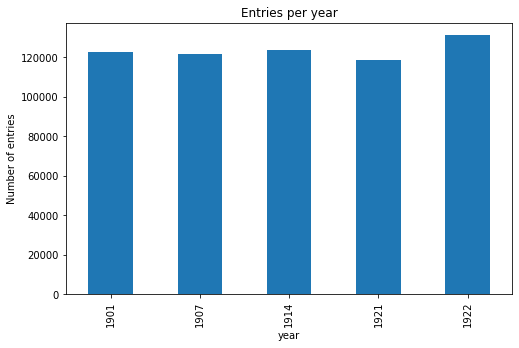
"></div>

In [ ]:
(data_bottin['name'].value_counts()
 .plot(kind='hist',loglog=True, bins=1000,
       title='Distribution of duplicate names',
       figsize=(8,5)).set_xlabel('Number of duplicates'));

Votre graphe devrait ressembler à ça (en utilisant `loglog=True` et `bins=1000`):
<img src="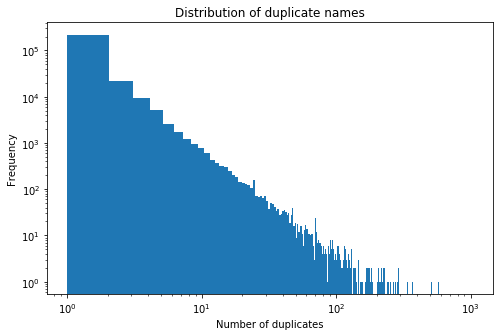
">

In [ ]:
(data_bottin['job'].value_counts()
 .plot(kind='hist',loglog=True, bins=1000,
       title='Distribution of duplicate jobs',
       figsize=(8,5)).set_xlabel('Number of duplicates'));

Votre graphe devrait ressembler à ça (en utilisant `loglog=True` et `bins=1000`):
<img src="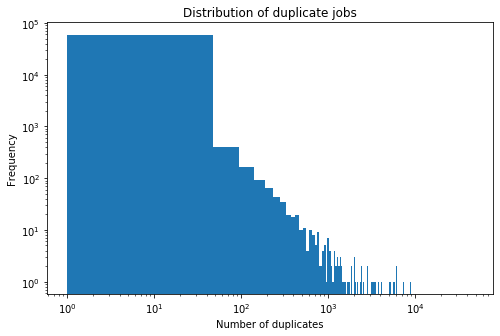
">

## Tâche 2

Le but de cette tâche est d'extraire les entrées avec un seul mot ou un seul mot et du contenu entre parenthèse dans `name` (ignorer les espaces avant et après).

Pour cette tâche, il vous suffira d'écrire une seul expression régulière, ce [lien](https://regex101.com/r/Ccyja3/1/tests) vous permettra de tester votre expression régulière.

Pour pouvoir extraire les lignes correspondantes, vous pouvez indexer les données avec le prédicat qui vous est retourné par `['name'].str.match`, c.f. la [doc](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.match.html?highlight=str%20match#pandas.Series.str.match).

In [ ]:
regex_one_word = '^\s*\w+(?:\s?\(.*\)\s*)?\s*$'

predicate_one_word = data_bottin['name'].str.match(regex_one_word) # à remplacer, pour le moment sélélectionne tout

data_bottin_one_word = data_bottin.loc[predicate_one_word].copy()

Vous devriez obtenir le résultat suivant, avec 526943 lignes:
<div class="output_subarea output_html rendered_html output_result"><div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>directory</th>
      <th>page</th>
      <th>row</th>
      <th>year</th>
      <th>name</th>
      <th>job</th>
      <th>street</th>
      <th>number</th>
      <th>street_clean</th>
      <th>street_only</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>2</td>
      <td>1901</td>
      <td>Aarault</td>
      <td>vins et hôtel</td>
      <td>r. St-Honoré</td>
      <td>312.</td>
      <td>rue Saint-Honoré</td>
      <td>Saint-Honoré</td>
    </tr>
    <tr>
      <th>1</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>3</td>
      <td>1901</td>
      <td>Aaron</td>
      <td>march. de chevaux</td>
      <td>r. Bouret</td>
      <td>39</td>
      <td>rue Bouret</td>
      <td>Bouret</td>
    </tr>
    <tr>
      <th>2</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>7</td>
      <td>1901</td>
      <td>Aaron</td>
      <td>fantaisies pour modes</td>
      <td>quai Jemmapes</td>
      <td>56.</td>
      <td>quai Jemmapes</td>
      <td>Jemmapes</td>
    </tr>
    <tr>
      <th>3</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>9</td>
      <td>1901</td>
      <td>Aaron (Emile et Edouard)</td>
      <td>négociants</td>
      <td>cour et pass. des Petites-Écuries</td>
      <td>20.</td>
      <td>courue et passage des Petites-Écuries</td>
      <td>cous Petites-Écuries</td>
    </tr>
    <tr>
      <th>5</th>
      <td>bpt6k97631451</td>
      <td>644</td>
      <td>12</td>
      <td>1901</td>
      <td>Abadie (Ch. Vallois succcess.)</td>
      <td>fabr. de billards</td>
      <td>r. du Grand-Prieuré</td>
      <td>8.</td>
      <td>rue du Grand-Prieuré</td>
      <td>Grand-Prieuré</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>617230</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>256</td>
      <td>1922</td>
      <td>Zwinger (E.)</td>
      <td>commiss. en march</td>
      <td>r. Saulnier</td>
      <td>7.</td>
      <td>rue Saulnier</td>
      <td>Saulnier</td>
    </tr>
    <tr>
      <th>617232</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>259</td>
      <td>1922</td>
      <td>Zygomalas</td>
      <td>perles fausses</td>
      <td>r. de Constantinople</td>
      <td>28.</td>
      <td>rue de Constantinople</td>
      <td>Constantinople</td>
    </tr>
    <tr>
      <th>617233</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>261</td>
      <td>1922</td>
      <td>Zysapel</td>
      <td>restaurant</td>
      <td>r. des Ecouffes</td>
      <td>14.</td>
      <td>rue des Ecouffes</td>
      <td>s Ecouffes</td>
    </tr>
    <tr>
      <th>617234</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>263</td>
      <td>1922</td>
      <td>Zyssmann</td>
      <td>bar</td>
      <td>r. de Pivoli</td>
      <td>40.</td>
      <td>rue de Pivoli</td>
      <td>Pivoli</td>
    </tr>
    <tr>
      <th>617235</th>
      <td>bpt6k9780089g</td>
      <td>1607</td>
      <td>267</td>
      <td>1922</td>
      <td>Zzaoui (Jacques)</td>
      <td>dentiste</td>
      <td>r. de l'Arrivée</td>
      <td>22.</td>
      <td>rue de l'Arrivée</td>
      <td>l'Arrivée</td>
    </tr>
  </tbody>
</table>
<p>526943 rows × 10 columns</p>
</div></div>

## Tâche 3

Le but de cette tâche est d'extraire le compte de chaque mot dans le texte entre parenthèse dans `name`.

La première étape est d'extraire de le texte entre parenthèse, il existe une fonction dans `.str` pour faire ça, à vous de la trouver. N'oubliez pas de supprimer les entrées sans parenthèse, par exemple avec `.dropna()` et d'indexer pour obtenir une série.

In [ ]:
regex_parens = '^.*?\((.*)\).*?$'

name_parens = data_bottin['name'].str.extract(regex_parens).dropna()[0]

Vous devriez obtenir le résultat suivant avec 238405 lignes:
    <pre>3              Emile et Edouard
5         Ch. Vallois succcess.
6                           Mme
12                           A.
13                   Charles d'
                  ...          
617227                       F.
617229                    Henri
617230                       E.
617231                      Ch.
617235                  Jacques
Name: 0, Length: 238405, dtype: object</pre>

L'étape suivant est de séparer chaque entrée en mot, puis de les compter.

Il existe une fonction dans `.str` pour séparer en mot. La manière la plus simple est de séparer sur l'espace, mais on peut aller plus loin, à vous de choisir.

pour compter les mots, il faudra retourner dans du python et donc itérer sur chaque entrée.

Une manière élégante de compter est d'utiliser l'objet `Counter` de `collections`, c.f. la [doc](https://docs.python.org/3.8/library/collections.html#collections.Counter).

In [ ]:
from collections import Counter
name_parens_split = name_parens.str.split('\W')
name_parens_split = name_parens_split.apply(lambda words: [word for word in words if len(word) > 0])

word_counts = Counter()

for words in name_parens_split.values:
    word_counts.update(words)
    
word_counts.most_common(5)

Le résultat dépendra de la manière dont vous avez séparer les mots, chez moi les 5 mots les plus communs sont:
<pre>[('Mme', 35434), ('A', 26038), ('J', 13684), ('E', 13459), ('L', 11975)]</pre>


## Tâche 4

Le but de cette tâche est d'extraite le compte des mots dans les entrées ne matchant pas le résultats de la tâche 1.

Il suffit de suivre une marche à suivre similare à la tâche précédente.

In [ ]:
from collections import Counter
name_one_word_split = data_bottin.loc[~predicate_one_word]['name'].str.split('\W')
name_one_word_split = name_one_word_split.apply(lambda words: [word for word in words if len(word) > 0])

word_counts = Counter()

for words in name_one_word_split.values:
    word_counts.update(words)
word_counts.most_common(5)

Le résultat dépendra de la manière dont vous avez séparer les mots, chez moi les 5 mots les plus communs sont:
<pre>[('et', 29457), ('Cie', 10409), ('de', 6668), ('fils', 5747), ('A', 4734)]</pre>


## Tâche 5

Le but de cette tâche est de grouper les métiers par `name`, `job`, `street` et `number`, puis d'afficher la distribution sous la forme d'une dataframe.

Cela peut-être réaliser en une seule ligne et en utilisant que des fonctions pandas.

In [ ]:
(data_bottin
 .groupby(['name', 'job', 'street', 'number'])
 .size()
 .sort_values(ascending=False)
 .value_counts()
 .to_frame('Count')
 .rename_axis('Number of duplicates'))

Vous devriez obtenir les résultats suivants:

<div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: middle;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Count</th>
    </tr>
    <tr>
      <th>Number of duplicates</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>408887</td>
    </tr>
    <tr>
      <th>2</th>
      <td>67471</td>
    </tr>
    <tr>
      <th>3</th>
      <td>17842</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3262</td>
    </tr>
    <tr>
      <th>5</th>
      <td>794</td>
    </tr>
  </tbody>
</table>
</div>

Il est possible d'aller un petit peu plus loin en utilisant `street_only` et en nettoyant un peu les nombre, par exemple en ne prenant que le premier chiffre et bis. C.f. les tâches précédente pour l'extraction

In [ ]:
data_bottin['number_clean'] = data_bottin['number'].str.extract('(^\d+(?: ?bis)?).*')

(data_bottin
 .groupby(['name', 'job', 'street_only', 'number_clean'])
 .size()
 .sort_values(ascending=False)
 .value_counts()
 .to_frame('Count')
 .rename_axis('Number of duplicates'))

Vous obtiendrez des résultats similaires au suivants en fonction de votre nettoyage:
    <div>
<style scoped="">
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>Count</th>
    </tr>
    <tr>
      <th>Number of duplicates</th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>1</th>
      <td>381464</td>
    </tr>
    <tr>
      <th>2</th>
      <td>73914</td>
    </tr>
    <tr>
      <th>3</th>
      <td>20401</td>
    </tr>
    <tr>
      <th>4</th>
      <td>3864</td>
    </tr>
    <tr>
      <th>5</th>
      <td>1008</td>
    </tr>
  </tbody>
</table>
</div>